# Código del Servidor (PRD.py)

# Introducción

Este programa implementa una solución de control remoto entre un servidor y un cliente utilizando Python. El objetivo principal es permitir al cliente interactuar con el servidor de forma remota. Las funcionalidades clave incluyen:

- **Chat**: Permite al cliente y al servidor comunicarse en tiempo real.
- **Captura de pantalla**: Permite al cliente solicitar y recibir imágenes de la pantalla del servidor.

# Descripcion

# Servidor (PRD.py)
El archivo PRD.py actúa como el servidor en esta configuración. Su principal responsabilidad es escuchar y aceptar conexiones entrantes de los clientes. Una vez que se establece una conexión, el servidor puede recibir y responder a las solicitudes del cliente. Aquí están las funcionalidades en detalle:

## Menú
El servidor proporciona un menú interactivo para el usuario. Este menú puede incluir varias opciones, como iniciar un chat, tomar una captura de pantalla, etc. El menú se actualiza dinámicamente en función de las acciones del usuario y del estado del sistema.

## Captura de Pantalla
Esta funcionalidad permite al servidor tomar capturas de pantalla de su propia máquina. Esto puede ser útil para fines de diagnóstico o para compartir la vista actual del servidor con el cliente.

## Chat
El servidor puede participar en una comunicación bidireccional con el cliente. Esto significa que tanto el servidor como el cliente pueden enviar y recibir mensajes entre sí.

# Cliente (CRD.py)
El archivo CRD.py actúa como el cliente. El cliente es la interfaz principal a través de la cual el usuario interactúa con el servidor. Aquí están las funcionalidades en detalle:

## Chat
Al igual que el servidor, el cliente también puede participar en el chat. El cliente puede enviar mensajes al servidor.

## Captura de Pantalla
El cliente puede solicitar al servidor que tome una captura de pantalla del lado del servidor. 

## Desconexión
Esta funcionalidad permite al cliente desconectarse del servidor de manera segura.

## Dependencias
Para que este código funcione correctamente, necesitarás tener la biblioteca `pyautogui` instalada en el entorno de Python del servidor.
import socket
import pyautogui
import base64
import os

#Codigo de PRD.py

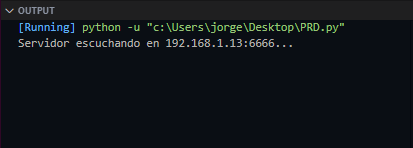

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

# Ejecución
Para ejecutar este programa, primero debes ejecutar el servidor (PRD.py) y luego el cliente (CRD.py).

## Ejemplo de Uso
Una vez que el servidor y el cliente están en ejecución, puedes interactuar con el servidor de las siguiente manera:
-Abre el chat.
-Escribe “sc” para tomar una captura de pantalla.
-Escribe “esc” para salir del chat.
-Escribe 3 para desconectar el servidor

# PRD.py
Este código implementa un servidor en una red que puede interactuar con un cliente a través de un chat y capturar y enviar capturas de pantalla. Aquí está una explicación detallada y seccionada del código:

## Importaciones

In [ ]:
import socket
import pyautogui
import base64
import os

Aquí se importan las bibliotecas necesarias para el funcionamiento del programa. socket se utiliza para la comunicación en red, pyautogui para la captura de pantalla, base64 para la codificación de la imagen de la captura de pantalla y os para las operaciones del sistema operativo.

## Funciones

In [ ]:
def capture_screen():
    screenshot = pyautogui.screenshot()
    encoded_image = base64.b64encode(screenshot.tobytes())
    connection.sendall(encoded_image)
    desktop_path = os.path.expanduser("~/Desktop")
    screenshot.save(os.path.join(desktop_path, "screenshot.png"))

Esta función captura la pantalla del servidor, codifica la imagen en base64 y la envía al cliente. También guarda una copia de la captura de pantalla en el escritorio del servidor.

In [ ]:
def clear_console():
    os.system("cls" if os.name == "nt" else "clear")


Esta función limpia la consola del servidor.

## Configuración del servidor

In [ ]:
HOST = "192.168.1.13"
PORT = 6666

Aquí se definen el host y el puerto en los que el servidor escuchará las conexiones entrantes.

## Creación del socket y escucha de conexiones

In [ ]:
try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind((HOST, PORT))
    sock.listen(1)

    print(f"Servidor escuchando en {HOST}:{PORT}...")

    connection, client_address = sock.accept()
    print(f"Cliente conectado desde {client_address}")

: 

Aquí se crea un socket, se enlaza al host y al puerto especificados, y se comienza a escuchar las conexiones entrantes. Cuando se acepta una conexión, se imprime la dirección del cliente.

## Interacción con el cliente

In [ ]:
 chat = False

    while True:
        data = connection.recv(1024).decode("utf-8")

        if data.lower() == "exit" or data == "3":
            print("Cliente solicitó cerrar la conexión.")
            break
        elif data.lower() == "esc":
            chat = False
        elif data == "1" or chat:
            if chat == False:
                clear_console()
                print("\n\nEstás ubicado en el chat.")
                print("Para salir del chat, escribe 'esc'.")

            chat = True
            print(data)
        elif data == "2":
            capture_screen()

En este bucle, el servidor recibe datos del cliente y realiza diferentes acciones dependiendo de los datos recibidos. Puede entrar en un modo de chat, capturar la pantalla, o cerrar la conexión.

## Manejo de interrupciones y cierre del servidor

In [ ]:
except KeyboardInterrupt:
    print("\nServidor detenido por el usuario.")
finally:
    sock.close()
    print("Servidor desconectado")

Si el usuario interrumpe el programa, se cierra el servidor.

# crd.py 

## Configuración del Cliente

In [ ]:
import socket
import os

HOST = "192.168.1.13"
PORT = 6666

En esta sección, se definen las variables HOST y PORT, que representan la dirección IP y el puerto del servidor al que el cliente se conectará.

## Funciones

In [ ]:
def clear_console():
    os.system("cls" if os.name == "nt" else "clear")


La función clear_console() se utiliza para limpiar la consola del cliente. Esto asegura que la interfaz de usuario sea más legible y ordenada.

In [ ]:
def menu():
    clear_console()

    print("\n1. Abrir chat")
    print("2. Screenshot")
    print("3. Desconectarse")
    choice = input("Elije una opción: ")
    return choice


La función menu() muestra un menú al usuario y recoge su elección. Dependiendo de la opción seleccionada, el cliente realizará diferentes acciones.

## Configuración del servidor

In [ ]:
try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.connect((HOST, PORT))

    print("Conexión establecida.")


En este bloque try, se crea un socket y se establece una conexión con el servidor. Si la conexión es exitosa, se imprime un mensaje indicando que la conexión se ha establecido correctamente.

## Interacción con el Servidor

In [ ]:
try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind((HOST, PORT))
    sock.listen(1)

    print(f"Servidor escuchando en {HOST}:{PORT}...")

    connection, client_address = sock.accept()
    print(f"Cliente conectado desde {client_address}")


Aquí se crea un socket, se enlaza al host y al puerto especificados, y se comienza a escuchar las conexiones entrantes. Cuando se acepta una conexión, se imprime la dirección del cliente.

## Interacción conel servidor 

In [ ]:
while True:
        choice = menu()
        sock.sendall(choice.encode("utf-8"))

        if choice.lower() == "1":
            clear_console()
            
            print("\n\nEstás ubicado en el chat.")
            print("Para salir del chat, escribe 'esc'.")
            print("Para hacer un capture de la pantalla principal, escribe 'esc'.")
            while True:
                message = input("Escribe tu mensaje: ")
                sock.sendall(message.encode("utf-8"))
                if message.lower() == "esc":
                    break
        elif choice == "2":
                message = "2"
                sock.sendall(message.encode("utf-8"))
        elif choice == "3":
            sock.sendall("3".encode("utf-8"))
            print("Desconectándose del servidor.")
            break    
        elif choice == "4":
                sock.sendall("4".encode("utf-8"))
        else:
            print("Opción no válida. Inténtalo de nuevo.")

En este bucle, el cliente recoge la elección del usuario y envía esta elección al servidor. Dependiendo de la opción seleccionada, se entra en el modo de chat, se solicita una captura de pantalla o se desconecta del servidor.

## Manejo de interrupciones y cierre del servidor

In [ ]:
except KeyboardInterrupt:
    print("\nCliente detenido por el usuario.")
finally:
    sock.close()


Si el usuario interrumpe el programa (por ejemplo, presionando Ctrl+C), se cierra la conexión con el servidor y se imprime un mensaje indicando que el cliente se ha detenido.

# Sistema de Chat y Captura de Pantalla con Python

Este proyecto consta de dos scripts de Python, `PRD.py` y `crd.py`, que implementan un sistema de chat y captura de pantalla a través de una red.

## Descripción

El script `PRD.py` actúa como un servidor que escucha las conexiones entrantes de los clientes. Una vez que se establece una conexión, el servidor puede interactuar con el cliente a través de un chat y capturar y enviar capturas de pantalla.

El script `crd.py` actúa como un cliente que se conecta al servidor. Una vez que se establece la conexión, el cliente puede interactuar con el servidor a través de un chat y solicitar capturas de pantalla.

## Dependencias

Para que estos scripts funcionen correctamente, necesitarás tener la biblioteca `pyautogui` instalada en tu entorno de Python.

## Uso

Para utilizar este sistema, sigue estos pasos:

1. Ejecuta el servidor (`PRD.py`).
2. Ejecuta el cliente (`crd.py`).

Una vez que el servidor y el cliente están en ejecución, puedes interactuar con el servidor de las siguientes maneras:

- Abre el chat.
- Escribe “sc” para tomar una captura de pantalla.
- Escribe “esc” para salir del chat.

# Instalación

Para que estos scripts funcionen correctamente, necesitarás tener instaladas algunas bibliotecas en tu entorno de Python. Aquí están los pasos para instalarlas:

1. **Instala Python**: Si aún no lo has hecho, necesitarás instalar Python en tu sistema. Puedes descargarlo desde el sitio web oficial de Python.

2. **Instala las bibliotecas necesarias**: Estos scripts requieren las bibliotecas `socket`, `pyautogui`, `base64` y `os`. `socket`, `base64` y `os` ya están incluidas en la instalación estándar de Python, pero necesitarás instalar `pyautogui`. Para hacerlo, abre una terminal y ejecuta el siguiente comando:

```bash
pip install pyautogui

Esto instalará la biblioteca pyautogui en tu entorno de Python.

Con Python y las bibliotecas necesarias instaladas, ahora deberías poder ejecutar los scripts PRD.py y crd.py.

# Implmentacion en Java
para que ese programa se adapte a la aplicacion o programa que mando por el uneg virtual se pondri implemtnar de la siguiente manera:

In [ ]:
import org.python.util.PythonInterpreter;
import java.io.*;

public class JythonScreenshotExample {
    public static void main(String[] args) {
        try (PythonInterpreter pyInterp = new PythonInterpreter()) {
            pyInterp.exec("import pyautogui");
            pyInterp.exec("import base64");
            pyInterp.exec("import os");

            // Capturar la pantalla en Python
            pyInterp.exec("screenshot = pyautogui.screenshot()");
            pyInterp.exec("encoded_image = base64.b64encode(screenshot.tobytes())");

            // Simular la conexión y enviar la imagen (reemplaza esto con tu lógica real)
            pyInterp.exec("connection = None"); // Simulación de la conexión
            pyInterp.exec("connection.sendall(encoded_image)");

            // Guardar la imagen en el escritorio
            pyInterp.exec("desktop_path = os.path.expanduser('~/Desktop')");
            pyInterp.exec("screenshot.save(os.path.join(desktop_path, 'screenshot.png'))");

            System.out.println("Captura de pantalla enviada y guardada en el escritorio.");
        }
    }
}

Para lograr la funcionalidad de escritorio remoto en el programa solicitado, se implementó una función utilizando las bibliotecas de Java, javac y Jython. Luego, simplemente se importaría el nombre de la función o se colocaría directamente en el lugar donde se necesite, realizando una llamada a la función. 

# Programas completos

## PRD.py

In [ ]:
import socket
import pyautogui
import base64
import os


def capture_screen():
    screenshot = pyautogui.screenshot()
    encoded_image = base64.b64encode(screenshot.tobytes())
    connection.sendall(encoded_image)
    # Guardar la imagen en el escritorio
    desktop_path = os.path.expanduser("~/Desktop")
    screenshot.save(os.path.join(desktop_path, "screenshot.png"))


def clear_console():
    os.system("cls" if os.name == "nt" else "clear")


HOST = "192.168.1.13"
PORT = 6666

try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind((HOST, PORT))
    sock.listen(1)

    print(f"Servidor escuchando en {HOST}:{PORT}...")

    connection, client_address = sock.accept()
    print(f"Cliente conectado desde {client_address}")

    chat = False

    while True:
        data = connection.recv(1024).decode("utf-8")

        if data.lower() == "exit" or data == "3":
            print("Cliente solicitó cerrar la conexión.")
            break
        elif data.lower() == "esc":
            chat = False
        elif data == "1" or chat:
            if chat == False:
                clear_console()
                print("\n\nEstás ubicado en el chat.")
                print("Para salir del chat, escribe 'esc'.")

            chat = True
            print(data)
        elif data == "2":
            capture_screen()

except KeyboardInterrupt:
    print("\nServidor detenido por el usuario.")
finally:
    sock.close()
    print("Servidor desconectado")


## crd.py

In [ ]:
import socket
import os

HOST = "192.168.1.13"
PORT = 6666


def clear_console():
    os.system("cls" if os.name == "nt" else "clear")

def menu():
    clear_console()

    print("\n1. Abrir chat")
    print("2. Screenshot")
    print("3. Desconectarse")
    choice = input("Elije una opción: ")
    return choice

try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.connect((HOST, PORT))

    print("Conexión establecida.")

    while True:
        choice = menu()
        sock.sendall(choice.encode("utf-8"))

        if choice.lower() == "1":
            clear_console()
            
            print("\n\nEstás ubicado en el chat.")
            print("Para salir del chat, escribe 'esc'.")
            print("Para hacer un capture de la pantalla principal, escribe 'esc'.")
            while True:
                message = input("Escribe tu mensaje: ")
                sock.sendall(message.encode("utf-8"))
                if message.lower() == "esc":
                    break
        elif choice == "2":
                message = "2"
                sock.sendall(message.encode("utf-8"))
        elif choice == "3":
            sock.sendall("3".encode("utf-8"))
            print("Desconectándose del servidor.")
            break    
        elif choice == "4":
                sock.sendall("4".encode("utf-8"))
        else:
            print("Opción no válida. Inténtalo de nuevo.")

except KeyboardInterrupt:
    print("\nCliente detenido por el usuario.")
finally:
    sock.close()